In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.shape

(545, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
data.describe(include = "object").T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
numerical_features = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']

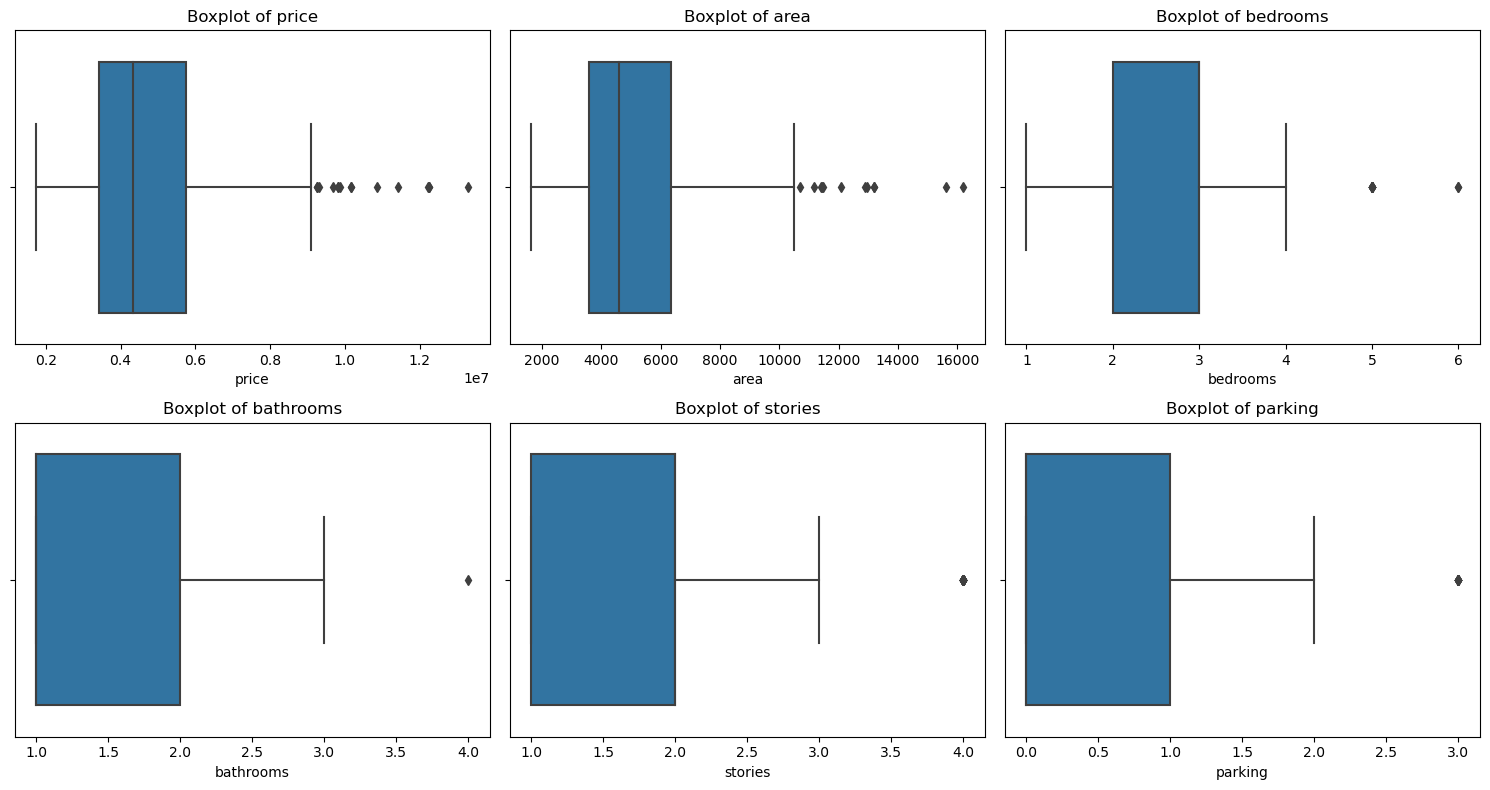

In [11]:
# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=feature, data=data)
    plt.title('Boxplot of {}'.format(feature))
plt.tight_layout()
plt.show()

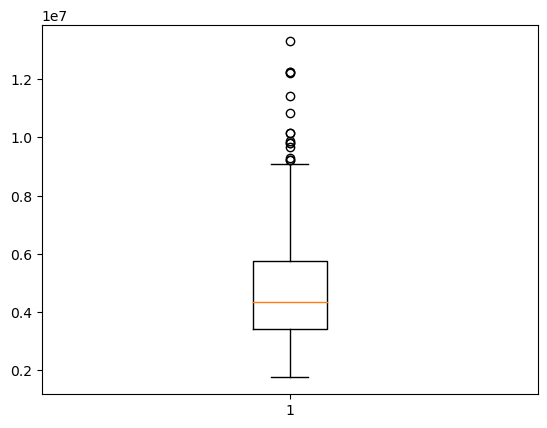

In [12]:
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

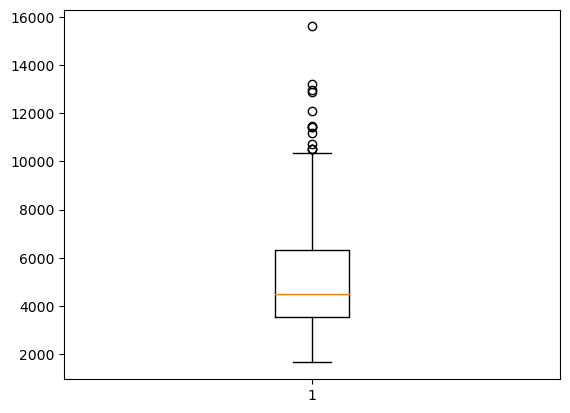

In [13]:
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

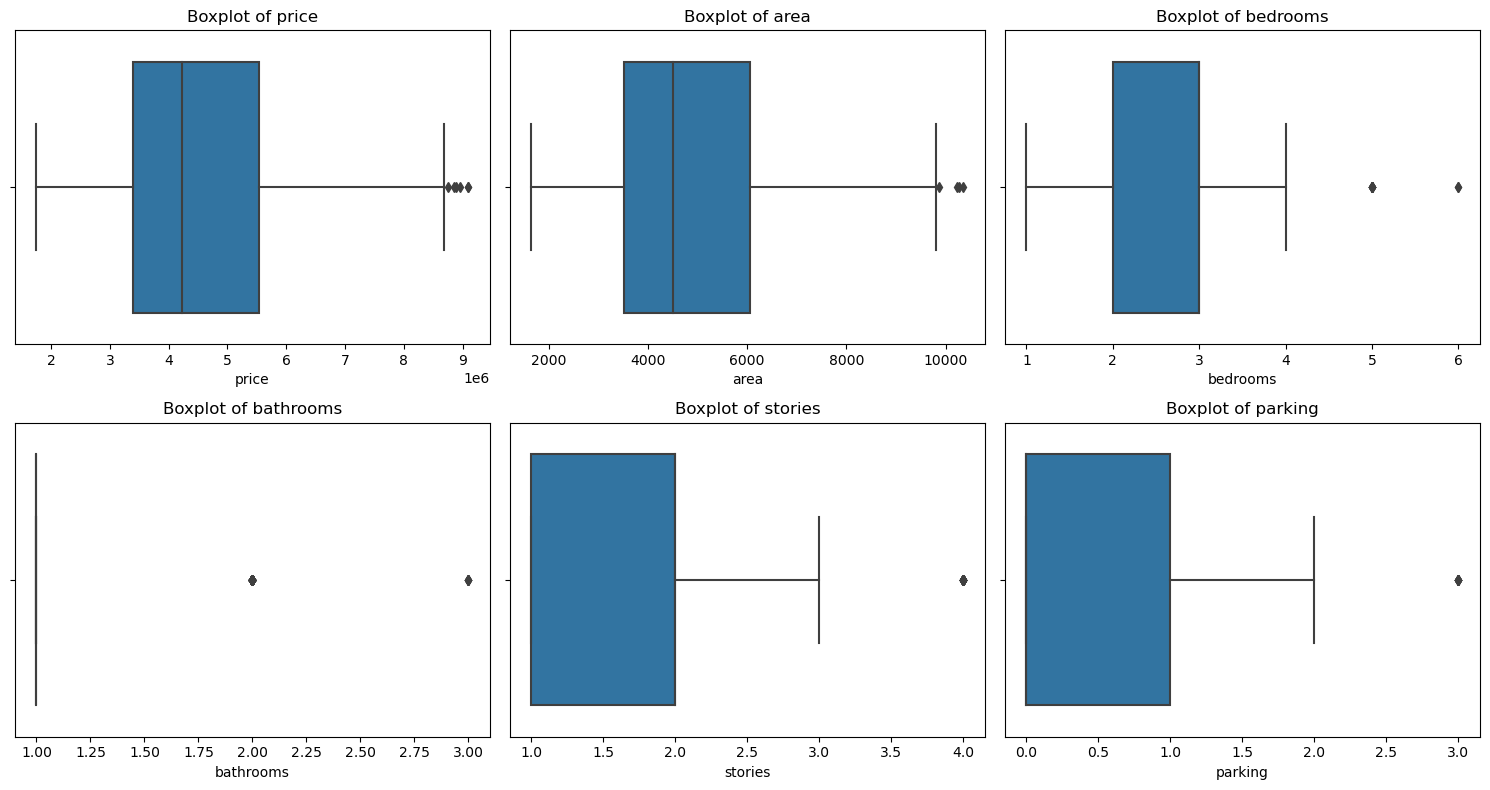

In [14]:
# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=feature, data=data)
    plt.title('Boxplot of {}'.format(feature))
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
# Identify columns of categorical values
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']  

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[columns] = data[columns].apply(binary_map)

In [ ]:
data.head()

In [ ]:
status = pd.get_dummies(data['furnishingstatus'],drop_first = True)
status = status.astype(int)

In [ ]:
status.head()

In [ ]:
data = pd.concat([data, status], axis = 1)

In [ ]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
data.head()

In [ ]:
# Feature Selection
# Dropping irrelevant features
X = data.drop(['price'], axis=1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ' ,X_train.shape)
print('X_test: ' ,X_test.shape)
print('Y_train: ' ,y_train.shape)
print('Y_test: ' ,y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue',marker = 'o',alpha=0.7,label = 'Actual Prices vs. Predicted Prices')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle = '--',color = 'red',linewidth = 2,label = 'Perfect Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()